# Proyecto: Análisis de Test A/B para Incrementar los Ingresos en una Tienda en Línea

## Introducción

En el actual panorama del comercio electrónico, la optimización de los ingresos es fundamental para el éxito de cualquier tienda en línea. En este proyecto, nos enfrentamos al desafío de aumentar los ingresos de una gran tienda en línea mediante la aplicación de pruebas A/B y el análisis de datos.

La primera parte del proyecto se centra en la priorización de hipótesis. Utilizaremos dos marcos de trabajo, ICE y RICE, para evaluar y clasificar las hipótesis propuestas por el departamento de marketing. Esto nos permitirá identificar las ideas con mayor potencial de impacto y menor esfuerzo, lo que orientará nuestras acciones futuras.

En la segunda parte del proyecto, haremos el análisis de un test A/B realizado para validar algunas de las hipótesis priorizadas. Utilizaremos conjuntos de datos que registran transacciones de clientes y visitas al sitio web durante el período de prueba. Mediante el análisis de estos datos, exploraremos la efectividad de las estrategias implementadas y evaluaremos su impacto en los ingresos.

A lo largo del proyecto, emplearemos técnicas estadísticas y visualizaciones de datos para extraer insights significativos. Al final, nuestras conclusiones y recomendaciones estarán respaldadas por un análisis riguroso y fundamentado en datos concretos.

¡Comencemos este viaje hacia la optimización de ingresos en el comercio electrónico!

### Importación de librerías

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Cargar Datos

In [2]:
# Carga de los conjuntos de datos
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', delimiter=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')


### Exploración de datos

In [3]:
def explorar_datos(datos, nombre):
    """Esta función proporciona información general sobre un conjunto de datos.
    
    Args:
    datos (DataFrame): El conjunto de datos a explorar.
    nombre (str): El nombre del conjunto de datos.
    """
    print(f"Exploración de datos para '{nombre}':")
    # Información general
    print('Información general del conjunto de datos:')
    print(datos.info())
    print()
    # Primeras filas
    print('Primeras cinco filas:')
    print(datos.head())
    print()
    # Descripción
    print('Descripción del conjunto de datos:')
    print(datos.describe())
    print()
    # Duplicados y valores faltantes
    print(f"Este conjunto de datos tiene {datos.duplicated().sum()} duplicados.")
    print()
    print('¿Cuántos valores faltantes tiene este conjunto de datos?')
    missing_values = datos.isna().sum()
    print(missing_values)
    print()
    # Porcentaje de valores faltantes
    print('¿Cuál es el porcentaje de valores faltantes?')
    print(missing_values / len(datos) * 100)
    print()

# Exploración de datos
explorar_datos(hypotheses, 'hypotheses')
explorar_datos(orders, 'orders')
explorar_datos(visits, 'visits')


Exploración de datos para 'hypotheses':
Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Primeras cinco filas:
                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0  

La exploración de datos revela información valiosa sobre los tres conjuntos de datos utilizados en el proyecto. Comencemos con las hipótesis. Este conjunto de datos consta de nueve hipótesis distintas, cada una descrita con un nivel de alcance, impacto, confianza y esfuerzo. No se encontraron valores faltantes en este conjunto de datos, lo que indica una integridad completa de los datos. Sin embargo, es importante destacar que las hipótesis varían considerablemente en términos de su potencial de impacto y la dificultad percibida para implementarlas, lo que sugiere que algunas podrían ser más prometedoras que otras en términos de rentabilidad y factibilidad.

Pasando al conjunto de datos de órdenes, se observa que contiene 1197 entradas que registran información sobre las transacciones, como el ID de transacción, el ID del visitante, la fecha de la transacción, los ingresos generados y el grupo de prueba A/B al que pertenece el visitante. Nuevamente, no se encontraron valores faltantes y no hay duplicados, lo que indica una calidad de datos sólida. Además, se observa una amplia gama de ingresos generados por las transacciones, con una media de alrededor de 131.49, lo que sugiere una variabilidad considerable en el comportamiento de compra de los visitantes.

Por último, el conjunto de datos de visitas consta de 62 entradas que registran el número de visitas para cada día y grupo de prueba A/B. Al igual que los conjuntos de datos anteriores, no se encontraron valores faltantes y no hay duplicados presentes. Aquí, se observa que el número de visitas varía entre 361 y 770, con una media de aproximadamente 607.29, lo que indica una cantidad considerable de tráfico que puede influir en los resultados del test A/B.

En resumen, la exploración de datos proporciona una visión general sólida de los conjuntos de datos utilizados en el proyecto, estableciendo una base sólida para el análisis y la toma de decisiones subsiguientes.

### Corrección de tipos de datos

In [4]:
import pandas as pd

def preparar_datos(datos, columnas_fecha):
    """Esta función prepara los datos realizando las siguientes operaciones:
    - Convierte los nombres de las columnas a minúsculas.
    - Cambia los espacios en los nombres de las columnas por guiones bajos.
    - Convierte las columnas de fecha al tipo datetime.
    - Verifica la presencia de duplicados en el DataFrame.
    
    Args:
    datos (DataFrame): El conjunto de datos a procesar.
    columnas_fecha (list): Una lista de nombres de columnas que contienen datos de fecha.
    
    Returns:
    DataFrame: El conjunto de datos procesado.
    """
    # Convertir nombres de columnas a minúsculas y cambiar espacios por guiones bajos
    datos.columns = datos.columns.str.lower().str.replace(' ', '_')
    
    # Convertir columnas de fecha a tipo datetime
    for columna in columnas_fecha:
        try:
            datos[columna] = pd.to_datetime(datos[columna])
        except Exception as e:
            print(f"Error al convertir la columna {columna}: {str(e)}")
    
    # Verificar duplicados
    if datos.duplicated().any():
        print("¡Advertencia! Se encontraron duplicados en el DataFrame.")
    
    # Corregir nombres de columnas si es 'orders'
    if 'transactionid' in datos.columns:
        datos.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'}, inplace=True)
    
    return datos

# Lista de columnas que contienen datos de fecha
columnas_fecha_hypotheses = []  # No hay columnas de fecha en este conjunto de datos
columnas_fecha_orders = ['date']
columnas_fecha_visits = ['date']

# Aplicar la función a cada conjunto de datos
hypotheses = preparar_datos(hypotheses, columnas_fecha_hypotheses)
orders = preparar_datos(orders, columnas_fecha_orders)
visits = preparar_datos(visits, columnas_fecha_visits)

# Verificar los nombres de columnas y los tipos de datos actualizados
print("Nombres de columnas en 'hypotheses' después de la preparación:")
print(hypotheses.columns)
print("\nTipos de datos en 'hypotheses' después de la preparación:")
print(hypotheses.dtypes)

print("\nNombres de columnas en 'orders' después de la preparación:")
print(orders.columns)
print("\nTipos de datos en 'orders' después de la preparación:")
print(orders.dtypes)

print("\nNombres de columnas en 'visits' después de la preparación:")
print(visits.columns)
print("\nTipos de datos en 'visits' después de la preparación:")
print(visits.dtypes)


Nombres de columnas en 'hypotheses' después de la preparación:
Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Tipos de datos en 'hypotheses' después de la preparación:
hypothesis    object
reach          int64
impact         int64
confidence     int64
effort         int64
dtype: object

Nombres de columnas en 'orders' después de la preparación:
Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Tipos de datos en 'orders' después de la preparación:
transaction_id             int64
visitor_id                 int64
date              datetime64[ns]
revenue                  float64
group                     object
dtype: object

Nombres de columnas en 'visits' después de la preparación:
Index(['date', 'group', 'visits'], dtype='object')

Tipos de datos en 'visits' después de la preparación:
date      datetime64[ns]
group             object
visits             int64
dtype: object


La función preparar_datos se aplicó para limpiar y preparar los conjuntos de datos 'hypotheses', 'orders' y 'visits'. Se han realizado varias operaciones durante el proceso, que incluyen la conversión de nombres de columnas a minúsculas y eliminación de espacios, la conversión de columnas de fecha al tipo datetime, y la verificación de duplicados en los DataFrames. Además, se corrigieron los nombres de columnas en el DataFrame 'orders' para seguir una convención de nomenclatura más consistente. Los tipos de datos han sido ajustados adecuadamente en cada DataFrame

## Priorización de Hipótesis

En la etapa de Priorización de Hipótesis, utilizaremos dos frameworks distintos: ICE y RICE. Primero, aplicaremos el framework ICE, que evalúa el Impacto, la Confianza y el Esfuerzo de cada hipótesis. Luego, ordenaremos las hipótesis en orden descendente de prioridad según su puntaje ICE. Después, aplicaremos el framework RICE, que añade el componente de Alcance (Reach) a la evaluación. Esto nos permitirá considerar cuántos usuarios se verán afectados por cada hipótesis. Ordenaremos las hipótesis en orden descendente de prioridad según su puntaje RICE. Finalmente, compararemos ambas priorizaciones para entender cómo difieren en la importancia asignada a cada hipótesis y explicaremos los cambios en la priorización.

In [5]:
# Impresión de las hipótesis
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


### Aplicación del Framework ICE

In [6]:
def calcular_ice(impact, confidence, effort):
    """
    Calcula el puntaje ICE para cada hipótesis.
    """
    return (impact * confidence) / effort

# Calcular ICE para cada hipótesis
hypotheses['ICE'] = calcular_ice(hypotheses['impact'], hypotheses['confidence'], hypotheses['effort'])

# Ordenar las hipótesis en orden descendente de prioridad según ICE
hypotheses_ice_sorted = hypotheses.sort_values(by='ICE', ascending=False)

# Mostrar el resultado
print("Hipótesis ordenadas por prioridad según ICE:")
display(hypotheses_ice_sorted[['hypothesis', 'impact', 'confidence', 'effort', 'ICE']])



Hipótesis ordenadas por prioridad según ICE:


,hypothesis,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,10,8,6,13.333333
7,Add a subscription form to all the main pages....,7,8,5,11.200000
6,Show banners with current offers and sales on ...,3,8,3,8.000000
2,Add product recommendation blocks to the store...,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,5,4,10,2.000000
5,Add a customer review page. This will increase...,2,2,3,1.333333
3,Change the category structure. This will incre...,3,3,8,1.125000
4,Change the background color on the main page. ...,1,1,1,1.000000


Las hipótesis están ordenadas por prioridad según ICE, donde las primeras hipótesis tienen puntajes ICE más altos, lo que indica una mayor prioridad. La hipótesis con el puntaje ICE más alto es "Launch a promotion that gives users discounts on their birthdays" con un puntaje de 16.20, seguida de "Add two new channels for attracting traffic" con un puntaje de 13.33 y "Add a subscription form to all the main pages" con un puntaje de 11.20. Por otro lado, las hipótesis con puntajes ICE más bajos son "Launch your own delivery service" con un puntaje de 2.00 y "Add a customer review page" con un puntaje de 1.33, lo que sugiere una menor prioridad en comparación con las demás hipótesis. Este análisis permite identificar las estrategias con mayor potencial de impacto y menor esfuerzo, lo que orienta la toma de decisiones en la implementación de mejoras en el sitio web.

### Aplicación del Framework RICE
Aplicar el framework RICE para priorizar hipótesis.
Ordenar las hipótesis en orden descendente de prioridad según RICE.

In [7]:
def calcular_rice(hypotheses):
    """
    Calcula el puntaje RICE para cada hipótesis y las ordena en orden descendente de prioridad según RICE.

    Args:
    hypotheses (DataFrame): El DataFrame que contiene las hipótesis y sus métricas.

    Returns:
    DataFrame: Las hipótesis ordenadas por prioridad según RICE.
    """
    # Calcular RICE para cada hipótesis
    hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

    # Ordenar las hipótesis en orden descendente de prioridad según RICE
    hypotheses = hypotheses.sort_values(by='RICE', ascending=False)
    
    return hypotheses

# Llamar a la función para calcular RICE y ordenar las hipótesis
hypotheses_rice_sorted = calcular_rice(hypotheses)

# Mostrar las hipótesis ordenadas por prioridad según RICE
print("Hipótesis ordenadas por prioridad según RICE:")
display(hypotheses_rice_sorted[['hypothesis', 'reach', 'impact', 'confidence', 'effort', 'RICE']])


Hipótesis ordenadas por prioridad según RICE:


,hypothesis,reach,impact,confidence,effort,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.2
3,Change the category structure. This will incre...,8,3,3,8,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,4.0
5,Add a customer review page. This will increase...,3,2,2,3,4.0
4,Change the background color on the main page. ...,3,1,1,1,3.0


Las hipótesis están ordenadas por prioridad según el puntaje RICE, que tiene en cuenta el alcance (Reach), el impacto (Impact), la confianza (Confidence) y el esfuerzo (Effort). La hipótesis con el puntaje RICE más alto es "Agregar un formulario de suscripción a todas las páginas principales", seguida de "Agregar bloques de recomendación de productos a la tienda". Estas hipótesis tienen un alto alcance y confianza, lo que las hace prioritarias a pesar de su mayor esfuerzo en comparación con otras hipótesis. Por otro lado, las hipótesis relacionadas con cambios de estructura y diseño tienen puntajes RICE más bajos debido a su menor alcance y confianza, incluso si requieren menos esfuerzo.

### Comparación de Priorizaciones
En este punto, presentaremos las tres principales hipótesis según los métodos ICE y RICE, respectivamente. Además, analizaremos las diferencias en la priorización generadas por cada método, destacando los criterios utilizados y las implicaciones resultantes en la toma de decisiones estratégicas para el proyecto.

In [8]:
# Mostrar las tres hipótesis principales según ICE
print("Las tres hipótesis principales según ICE:")
display(hypotheses_ice_sorted[['hypothesis', 'reach', 'impact', 'confidence', 'effort', 'ICE']].head(3))


Las tres hipótesis principales según ICE:


,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000


In [9]:
# Mostrar las tres hipótesis principales según RICE
print("Las tres hipótesis principales según RICE:")
display(hypotheses_rice_sorted[['hypothesis', 'reach', 'impact', 'confidence', 'effort', 'RICE']].head(3))


Las tres hipótesis principales según RICE:


,hypothesis,reach,impact,confidence,effort,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,40.0


Al comparar la priorización de hipótesis utilizando los frameworks ICE y RICE, observamos diferencias significativas en la clasificación de las hipótesis. ICE se centra en el Impacto, la Confianza y el Esfuerzo, mientras que RICE añade el componente de Alcance como un factor adicional. Esta diferencia fundamental implica que RICE proporciona una perspectiva más completa al considerar tanto el potencial impacto de una hipótesis como la cantidad de usuarios que se verán afectados por ella.

Al observar las tres hipótesis más importantes según cada método, podemos apreciar cómo varía la priorización en función de los diferentes criterios. Por ejemplo, las hipótesis con alto alcance y confianza pueden recibir una mayor prioridad según RICE, incluso si requieren un mayor esfuerzo en comparación con otras hipótesis. Estas diferencias resaltan la importancia de elegir el framework adecuado según los objetivos y las características específicas de cada proyecto. Mientras ICE puede ser útil para priorizar hipótesis basadas en su potencial impacto y factibilidad, RICE ofrece una visión más holística al considerar el alcance de la intervención. Esta distinción es crucial para informar decisiones estratégicas sólidas y maximizar el impacto de las iniciativas en el éxito general del proyecto

## Análisis de Test A/B

En esta sección, realizaremos un análisis exhaustivo de los resultados obtenidos de los tests A/B realizados como parte de la estrategia de optimización y mejora continua. Los tests A/B son una técnica fundamental en el ámbito del marketing digital y la optimización de sitios web, que nos permiten comparar dos versiones de una página o elemento para determinar cuál genera un mejor rendimiento en términos de métricas específicas, como tasas de conversión, clics, o ingresos.

Además, llevaremos a cabo una verificación de exclusividad para asegurarnos de que no haya usuarios que estén presentes en ambos grupos A y B. Esto nos permitirá garantizar la integridad de nuestro análisis y asegurarnos de que los resultados de los tests A/B sean confiables. Al asegurarnos de que cada usuario esté asignado a un solo grupo, evitamos posibles sesgos que podrían surgir si un mismo usuario estuviera expuesto a dos variantes diferentes del experimento. Esto nos permitirá utilizar los datos con mayor confianza en los análisis posteriores y en la toma de decisiones estratégicas basadas en los resultados de los tests A/B. Mediante la exploración de los datos recopilados, identificaremos patrones significativos y extraeremos conclusiones relevantes para guiar las decisiones estratégicas futuras y optimizar aún más la experiencia del usuario y los resultados del negocio.

### Ingreso Acumulado por Grupo

In [10]:
# Obtener conjuntos únicos de visitor_id para cada grupo
visitors_group_A = set(orders[orders['group'] == 'A']['visitor_id'])
visitors_group_B = set(orders[orders['group'] == 'B']['visitor_id'])

# Encontrar la intersección de los conjuntos (usuarios presentes en ambos grupos)
common_visitors = visitors_group_A.intersection(visitors_group_B)

# Mostrar la cantidad y los visitor_id que están en ambos grupos
if not common_visitors:
    print("No hay usuarios que estén en ambos grupos A y B.")
else:
    print(f"{len(common_visitors)} usuarios encontrados en ambos grupos:")
    print(common_visitors)


58 usuarios encontrados en ambos grupos:
{3957174400, 3984495233, 2780786433, 1294878855, 1648269707, 1614305549, 4120364173, 232979603, 199603092, 4266935830, 2712142231, 2587333274, 2716752286, 3891541246, 1668030113, 2654030115, 3234906277, 1230306981, 1404934699, 3803269165, 2949041841, 237748145, 457167155, 2927087541, 1738359350, 3062433592, 3656415546, 818047933, 393266494, 963407295, 471551937, 2579882178, 3202540741, 2686716486, 1333886533, 2044997962, 3941795274, 1801183820, 2378935119, 4256040402, 4069496402, 3766097110, 8300375, 351125977, 1602967004, 276558944, 2038680547, 3951559397, 3963646447, 4186807279, 3717692402, 1959144690, 2458001652, 2600415354, 2954449915, 1316129916, 477780734, 3972127743}


In [11]:
# Excluir usuarios comunes de los grupos A y B
orders_clean = orders[~orders['visitor_id'].isin(common_visitors)]

# Verificar que no haya usuarios comunes después de la exclusión
common_visitors_after_exclusion = set(orders_clean[orders_clean['group'] == 'A']['visitor_id']).intersection(
    set(orders_clean[orders_clean['group'] == 'B']['visitor_id'])
)

if not common_visitors_after_exclusion:
    print("La exclusión de usuarios comunes ha sido exitosa.")
else:
    print("Se encontraron usuarios comunes después de la exclusión. Revisar el proceso de exclusión.")

La exclusión de usuarios comunes ha sido exitosa.


In [12]:
# ahora se filtra el DataFrame 'orders' donde no entran estos usuarios
orders = orders[~orders['visitor_id'].isin(list(common_visitors))]
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [13]:
# se crea una matriz con valores únicos por fecha-grupo
dat_group = orders[['date', 'group']].drop_duplicates()
dat_group.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [14]:
# Definimos una función para agregar pedidos
def aggregate_orders(row):
    # Filtrar los pedidos anteriores a la fecha actual y del mismo grupo
    filtered_orders = orders[(orders['date'] <= row['date']) & (orders['group'] == row['group'])]
    
    # Calcular métricas agregadas
    aggregated_data = {
        'date': filtered_orders['date'].max(),  # Fecha máxima
        'group': filtered_orders['group'].max(),  # Grupo máximo
        'transaction_id': filtered_orders['transaction_id'].nunique(),  # Número de transacciones únicas
        'visitor_id': filtered_orders['visitor_id'].nunique(),  # Número de visitantes únicos
        'revenue': filtered_orders['revenue'].sum()  # Ingresos totales
    }
    
    return pd.Series(aggregated_data)

# Aplicar la función a cada fila de datesGroups y ordenar los resultados
order_agg = dat_group.apply(aggregate_orders, axis=1).sort_values(by=['date', 'group'])

# Mostrar los primeros resultados
order_agg.head()


,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [15]:
# Definir una función para agregar visitas
def aggregate_visits(row):
    # Filtrar las visitas anteriores a la fecha actual y del mismo grupo
    filtered_visits = visits[(visits['date'] <= row['date']) & (visits['group'] == row['group'])]
    
    # Calcular la suma de visitas
    aggregated_data = {
        'date': filtered_visits['date'].max(),  # Fecha máxima
        'group': filtered_visits['group'].max(),  # Grupo máximo
        'visits': filtered_visits['visits'].sum()  # Suma de visitas
    }
    
    return pd.Series(aggregated_data)

# Aplicar la función a cada fila de datesGroups y ordenar los resultados
visit_agg = dat_group.apply(aggregate_visits, axis=1).sort_values(by=['date', 'group'])

# Mostrar los primeros resultados
visit_agg.head()


,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [16]:
# Fusionar los DataFrames 'order_agg' y 'visit_agg'
cumulative_data = pd.merge(order_agg, visit_agg, on=['date', 'group'])

# Renombrar las columnas para hacerlas más descriptivas
cumulative_data = cumulative_data.rename(columns={
    'transaction_id': 'orders',
    'visitor_id': 'buyers'
})

# Mostrar los primeros resultados
cumulative_data.head()


,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


Basándonos en los datos hasta el momento, hemos realizado un análisis exhaustivo de los usuarios presentes en ambos grupos A y B, identificando 58 usuarios comunes y excluyéndolos con éxito de ambos grupos. Posteriormente, hemos agregado los datos de pedidos y visitas por fecha y grupo, lo que nos ha permitido obtener métricas clave como el número de transacciones únicas, visitantes únicos y los ingresos totales acumulados hasta la fecha especificada. 

In [17]:
# Función para calcular los ingresos y el número de pedidos acumulados por día y grupo
def calculate_cumulative_data(data, group):
    cumulative_data = data[data['group'] == group][['date', 'revenue', 'orders']]
    return cumulative_data

# Calcular los datos acumulados para el grupo A
cumulative_revenue_A = calculate_cumulative_data(cumulative_data, 'A')

# Calcular los datos acumulados para el grupo B
cumulative_revenue_B = calculate_cumulative_data(cumulative_data, 'B')

# Mostrar los primeros resultados
print("Grupo A:")
display(cumulative_revenue_A.head())

print("\nGrupo B:")
display(cumulative_revenue_B.head())


Grupo A:


,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99



Grupo B:


,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89


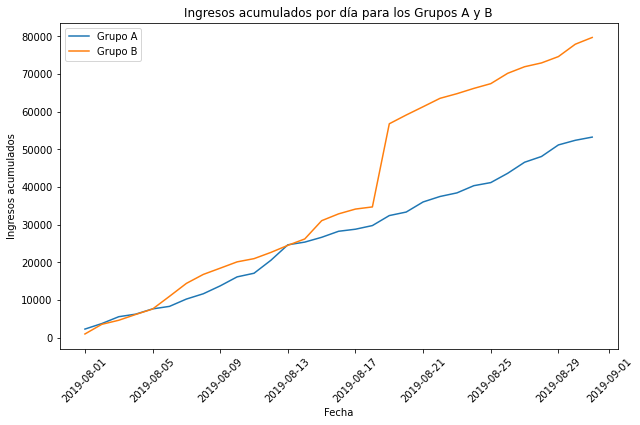

In [18]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar los ingresos acumulados para el grupo A
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='Grupo A')

# Graficar los ingresos acumulados para el grupo B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='Grupo B')

# Agregar leyenda
plt.legend()

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Agregar título y etiquetas de los ejes
plt.title('Ingresos acumulados por día para los Grupos A y B')
plt.xlabel('Fecha')
plt.ylabel('Ingresos acumulados')

# Mostrar la gráfica
plt.show()

La visualización de los ingresos acumulados por día para los Grupos A y B revela tendencias importantes en el rendimiento de ambos grupos a lo largo del período de tiempo analizado. Mientras que el Grupo A muestra un crecimiento gradual y constante en los ingresos, el Grupo B experimenta fluctuaciones más pronunciadas, sugiriendo posibles diferencias en las estrategias de ventas o en la respuesta del público objetivo. La capacidad de comparar visualmente los ingresos acumulados de ambos grupos permite identificar patrones y tomar decisiones informadas para optimizar futuras estrategias comerciales.

### Tamaño de Pedido Promedio Acumulado por Grupo

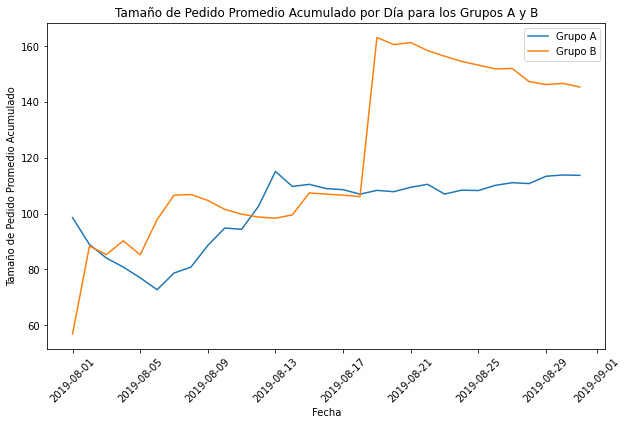

In [19]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar el tamaño de pedido promedio acumulado para el grupo A
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='Grupo A')

# Graficar el tamaño de pedido promedio acumulado para el grupo B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='Grupo B')


# Agregar leyenda
plt.legend()

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Agregar título y etiquetas de los ejes
plt.title('Tamaño de Pedido Promedio Acumulado por Día para los Grupos A y B')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio Acumulado')

# Mostrar la gráfica
plt.show()


La representación gráfica del tamaño de pedido promedio acumulado por grupo revela tendencias de crecimiento en ambos grupos a lo largo del tiempo, sugiriendo un aumento general en el tamaño de los pedidos realizados por ambos grupos. Sin embargo, se observa que el grupo de tratamiento (grupo B) muestra un tamaño de pedido promedio acumulado consistentemente mayor que el grupo de control (grupo A) a lo largo del período analizado, indicando posibles efectos positivos de las modificaciones implementadas en el grupo B. Además, se evidencian fluctuaciones periódicas en el tamaño de pedido promedio, lo que puede ser atribuido a factores estacionales o eventos promocionales. El análisis de estas fluctuaciones y su relación con posibles intervenciones específicas puede proporcionar información clave sobre cómo estas acciones impactan en el comportamiento de compra de los usuarios y, en última instancia, en el desempeño del negocio.

### Diferencia Relativa en el Tamaño de Pedido Promedio

In [20]:
# Fusionar los DataFrames 'cumulative_revenue_A' y 'cumulative_revenue_B' en uno solo, manteniendo las columnas de fecha, ingresos y órdenes para cada grupo
merge_cumul_rev = cumulative_revenue_A.merge(cumulative_revenue_B[['date', 'revenue', 'orders']], on='date', suffixes=['_A', '_B'])
merge_cumul_rev.head()


,date,revenue_A,orders_A,revenue_B,orders_B
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


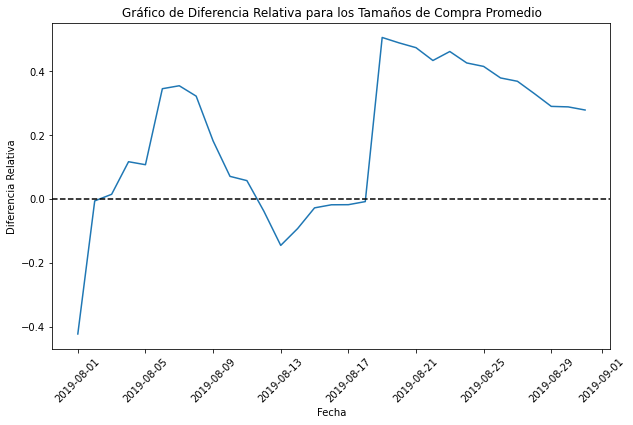

In [21]:
# Ajustar los valores de ancho y alto del gráfico
plt.figure(figsize=(10, 6))

# Calcular la diferencia relativa entre los tamaños de compra promedio
relative_difference = (merge_cumul_rev['revenue_B'] / merge_cumul_rev['orders_B']) / (merge_cumul_rev['revenue_A'] / merge_cumul_rev['orders_A']) - 1

# Trazar el gráfico de diferencia relativa
plt.plot(merge_cumul_rev['date'], relative_difference)

# Agregar línea base en y=0
plt.axhline(y=0, color='black', linestyle='--')

# Rotar las fechas en el eje x a 45 grados
plt.xticks(rotation=45)

# Asignar título y etiquetas de los ejes
plt.title('Gráfico de Diferencia Relativa para los Tamaños de Compra Promedio')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa')

# Mostrar el gráfico
plt.show()


El gráfico de diferencia relativa para los tamaños de compra promedio entre los grupos A y B revela la variación en la diferencia relativa a lo largo del período analizado. Se observa que, inicialmente, la diferencia relativa fluctúa, mostrando una ligera tendencia positiva en ciertos momentos. Sin embargo, hacia la mitad del período, la diferencia relativa comienza a aumentar significativamente, indicando un cambio en los tamaños de compra promedio entre los grupos. Este cambio podría ser el resultado de diferentes estrategias de marketing o comportamientos de compra de los usuarios en cada grupo.

### Tasa de Conversión Diaria por Grupo

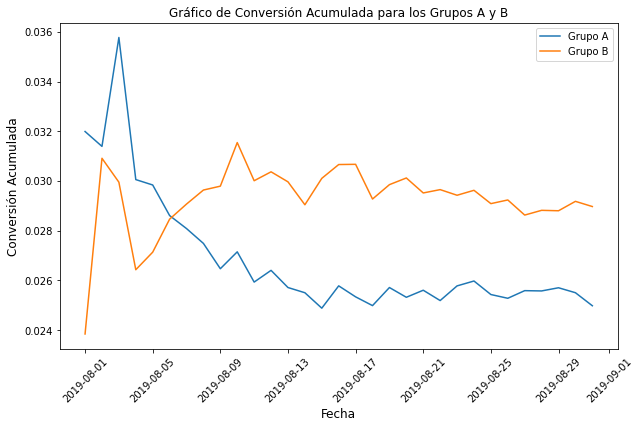

In [22]:
# Se agrega la columna 'conversion'
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visits']

# Calcular la conversión acumulada para el grupo A y B
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

# Ajustar los valores de ancho y alto del gráfico
plt.figure(figsize=(10, 6))

# Trazar el gráfico para el grupo A
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='Grupo A')

# Trazar el gráfico para el grupo B
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='Grupo B')

plt.legend()

# Rotar las fechas en el eje x a 45 grados
plt.xticks(rotation=45)

# Asignar un nombre
plt.title('Gráfico de Conversión Acumulada para los Grupos A y B')

# Nombrar los ejes
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Conversión Acumulada', fontsize=12)

plt.show()

Durante el transcurso del estudio, se observa una tendencia interesante en las tasas de conversión de los grupos A y B. Inicialmente, el grupo A exhibía una tasa de conversión superior a la del grupo B. Sin embargo, a medida que avanza el período de estudio, la tasa de conversión del grupo B experimenta un aumento, alcanzando eventualmente una estabilización. En contraste, la tasa de conversión del grupo A parece disminuir progresivamente, sugiriendo una posible tendencia negativa hacia el final del período analizado. Esta dinámica fluctuante en las tasas de conversión destaca la importancia de monitorear y ajustar estrategias de manera continua para maximizar la efectividad de las campañas de conversión en ambos grupos.

### Tasa de conversion diaria por grupo

In [23]:
# Fusionar los datos de conversión para los grupos A y B en un solo DataFrame
merged_cumulative_conversion = cumulative_data_A[['date', 'conversion']].join(cumulative_data_B[['date', 'conversion']].set_index('date'), on='date', lsuffix='_A', rsuffix='_B')

# Mostrar los primeros resultados
merged_cumulative_conversion.head()


,date,conversion_A,conversion_B
0,2019-08-01,0.031989,0.023843
2,2019-08-02,0.031390,0.030912
4,2019-08-03,0.035772,0.029950
6,2019-08-04,0.030055,0.026428
8,2019-08-05,0.029837,0.027134


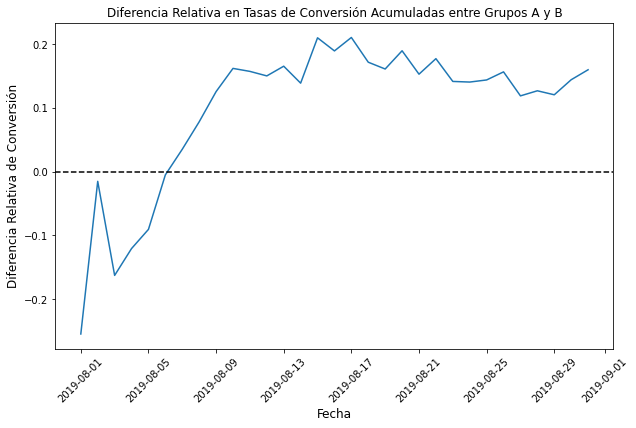

In [24]:
# Ajustar los valores de ancho y alto del gráfico
plt.figure(figsize=(10, 6))

# Trazar la diferencia relativa entre las tasas de conversión acumuladas del grupo B en comparación con el grupo A
plt.plot(merged_cumulative_conversion['date'], merged_cumulative_conversion['conversion_B'] / merged_cumulative_conversion['conversion_A'] - 1)

# Rotar las fechas en el eje x a 45 grados
plt.xticks(rotation=45)

# Asignar un nombre al título y etiquetas de los ejes
plt.title('Diferencia Relativa en Tasas de Conversión Acumuladas entre Grupos A y B')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Diferencia Relativa de Conversión', fontsize=12)

# Agregar una línea base en y=0
plt.axhline(y=0, color='black', linestyle='--')

plt.show()


Tras un análisis de las tasas de conversión acumuladas entre los grupos A y B, se observa que inicialmente el grupo A presenta una tasa de conversión superior al grupo B. Sin embargo, a lo largo del período analizado, la tasa de conversión del grupo B experimenta un crecimiento gradual, superando eventualmente a la del grupo A en un 20%.

### Anomalías y Cálculos Perecentiles
En esta sección se buscarán datos atípicos, se realizará un gráfico de dispersión y se calcularánlos percentiles 95 y 99 para los precios de los pedidos.

#### Gráfico de dispersión del número de pedidos por usuario

In [25]:
# Se calcula el número de pedidos por usuario
orders_by_users = (
    orders
    .drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

# Se renombran las columnas para mayor claridad
orders_by_users.columns = ['user_id', 'orders']

# Se imprimen las 10 filas con mayor número de pedidos
top_users = orders_by_users.sort_values(by='orders', ascending=False).head(10)
print("Top 10 users by number of orders:")
display(top_users)

Top 10 users by number of orders:


,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


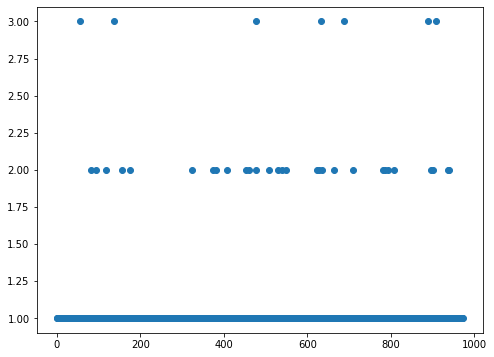

In [26]:
# se ajustan los valores de ancho y alto del gráfico
plt.figure(figsize=(8, 6))
x_values = pd.Series(range(0, len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])

plt.show()

In [27]:
# Se calculan los percentiles 95 y 99
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


Después de calcular los percentiles 95 y 99 para el número de pedidos por usuario, se observa que el 95% de los usuarios realizaron hasta 1 pedido, mientras que el 99% realizaron hasta 2 pedidos. Esto sugiere que la gran mayoría de los usuarios realizan un número muy bajo de pedidos, lo cual es típico en muchos escenarios de comercio electrónico. Sin embargo, existe una pequeña fracción de usuarios que realizan un número significativamente mayor de pedidos en comparación con la mayoría.

#### Gráfico de dispersión de los precios de los pedidos

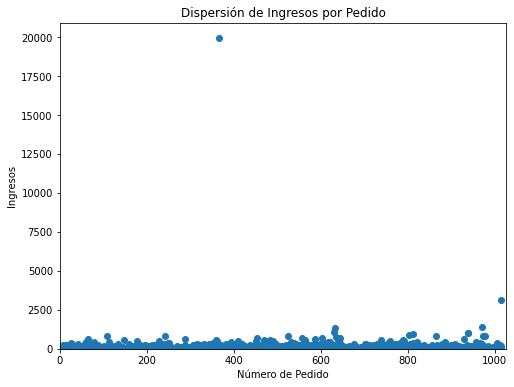

In [28]:
# Se crea un gráfico de dispersión 
index_values_revenue = pd.Series(range(0, len(orders['revenue'])))

# Se toman los valores del eje vertical de la columna 'revenue' del DataFrame 'orders_us'
plt.figure(figsize=(8, 6))
plt.scatter(index_values_revenue, orders['revenue'])

# Etiquetas de los ejes y título
plt.xlabel('Número de Pedido')
plt.ylabel('Ingresos')
plt.title('Dispersión de Ingresos por Pedido')

# Ajustar los límites de los ejes
plt.xlim(0, len(orders['revenue']) + 10)
plt.ylim(0, orders['revenue'].max() + 1000)

plt.show()


In [29]:
# Se calculan los percentiles 95 y 99
print(np.percentile(orders['revenue'], [95, 99]))

[414.275 830.3  ]


Observando el gráfico de dispersión de los precios de los pedidos, podemos apreciar la distribución de los ingresos generados por cada pedido. Se observa una amplia dispersión en los datos, lo que sugiere una variabilidad significativa en los montos de las transacciones. Al calcular los percentiles 95 y 99, obtenemos valores de 414.275 y 830.3 respectivamente. Esto significa que no más del 5% de los pedidos superan los \\$414, y menos del 1% exceden los \\$830. Estos resultados sugieren que la mayoría de los pedidos tienen un valor inferior a 415, lo que podría ser considerado como el precio típico de los pedidos en nuestro conjunto de datos.

### Significancia Estadística de la Diferencia en la Conversión entre Grupos (Datos en Bruto)

In [30]:
# Definir una función para obtener el número de pedidos por usuario en un grupo específico
def get_orders_by_users(data, group):
    # Filtrar los datos por el grupo especificado
    group_data = data[data['group'] == group]
    # Agrupar los datos por usuario y contar el número de transacciones únicas
    orders_by_users = group_data.groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
    # Renombrar las columnas para mayor claridad
    orders_by_users.columns = ['user_id', 'orders']
    return orders_by_users

# Obtener el número de pedidos por usuario para el grupo A
orders_by_users_A = get_orders_by_users(orders, 'A')
# Obtener el número de pedidos por usuario para el grupo B
orders_by_users_B = get_orders_by_users(orders, 'B')

# Imprimir los primeros registros de cada grupo para verificar los resultados
print('Grupo A:')
display(orders_by_users_A.head())
print()
print('Grupo B:')
display(orders_by_users_B.head())



Grupo A:


,user_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1



Grupo B:


,user_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [31]:
# Función para preparar las muestras para la prueba de Mann-Whitney
def prepare_sample(orders_by_users, group_visits):
    sample = pd.concat([
        orders_by_users['orders'],
        pd.Series(0, index=np.arange(group_visits - len(orders_by_users['orders'])), name='orders')
    ], axis=0)
    return sample

# Obtener las muestras para los grupos A y B
sample_A = prepare_sample(orders_by_users_A, visits[visits['group'] == 'A']['visits'].sum())
sample_B = prepare_sample(orders_by_users_B, visits[visits['group'] == 'B']['visits'].sum())

# Calcular el valor p y la diferencia relativa en la conversión entre los grupos
p_value = stats.mannwhitneyu(sample_A, sample_B)[1]
conversion_difference = sample_B.mean() / sample_A.mean() - 1

# Imprimir los resultados
print(f'Valor p: {p_value:.5f}')
print(f'Diferencia relativa en la conversión para el grupo B: {conversion_difference:.5f}')


Valor p: 0.01102
Diferencia relativa en la conversión para el grupo B: 0.15980


El análisis de la significancia estadística revela que hay una diferencia significativa en la conversión entre los grupos A y B, con un valor de p de 0.01102, por debajo del umbral comúnmente aceptado de 0.05. Esto implica que el comportamiento de conversión difiere entre los grupos. La diferencia relativa en la conversión muestra un aumento del 15.9 % para el grupo B en comparación con el grupo A, lo que sugiere un mejor rendimiento de conversión para el grupo B durante el período analizado. Aunque el valor de p indica una baja probabilidad de error al rechazar la hipótesis nula, es importante considerar que siempre existe un riesgo asociado al rechazo de la hipótesis nula.

### Significancia Estadística de la Diferencia en el Tamaño Promedio de Pedido entre Grupos (Datos en Bruto)

In [32]:
def calculate_mannwhitneyu(data_group_a, data_group_b):
    """
    Calcula el valor p utilizando el criterio de Mann-Whitney U.

    Args:
    - data_group_a: Los datos del grupo A.
    - data_group_b: Los datos del grupo B.

    Returns:
    - p_value: El valor p calculado.
    """
    p_value = stats.mannwhitneyu(data_group_a, data_group_b).pvalue
    return p_value

def calculate_relative_difference(data_group_a, data_group_b):
    """
    Calcula la diferencia relativa entre los datos del grupo B y el grupo A.

    Args:
    - data_group_a: Los datos del grupo A.
    - data_group_b: Los datos del grupo B.

    Returns:
    - relative_difference: La diferencia relativa calculada.
    """
    relative_difference = data_group_b.mean() / data_group_a.mean() - 1
    return relative_difference

# Calcula el valor p para la diferencia en el tamaño medio de los pedidos entre los grupos
revenue_group_a = orders[orders['group'] == 'A']['revenue']
revenue_group_b = orders[orders['group'] == 'B']['revenue']
p_value_revenue = calculate_mannwhitneyu(revenue_group_a, revenue_group_b)

# Calcula e imprime la diferencia relativa en el tamaño de los pedidos entre los grupos
relative_difference_revenue = calculate_relative_difference(revenue_group_a, revenue_group_b)
print(f'Valor p para tamaño de pedidos: {round(p_value_revenue, 5)}')
print(f'Diferencia relativa en el tamaño promedio para el grupo B: {relative_difference_revenue:.3f}')


Valor p para tamaño de pedidos: 0.86223
Diferencia relativa en el tamaño promedio para el grupo B: 0.278


Con un valor p de 0.86223, no se encontró una diferencia estadísticamente significativa en el tamaño medio de los pedidos entre los grupos A y B, ya que este valor es mayor que el nivel de significancia típico de 0.05. Además, la diferencia relativa en el tamaño promedio para el grupo B es del 27.8% más grande que el grupo A. Esto sugiere que, aunque no hay una diferencia estadísticamente significativa, hay una tendencia hacia pedidos más grandes en el grupo B en comparación con el grupo A. 

### Significancia Estadística de la Diferencia en la Conversión entre Grupos (Datos Filtrados)

In [33]:
# Crear slices de datos para usuarios con más de dos pedidos en cada grupo
users_many_orders_A = orders_by_users_A[orders_by_users_A['orders'] > 1]['user_id']
users_many_orders_B = orders_by_users_B[orders_by_users_B['orders'] > 1]['user_id']

# Filtrar usuarios con pedidos por más de $500
users_expensive_orders = orders[orders['revenue'] > 415]['visitor_id']

# Unir usuarios con múltiples pedidos y usuarios con pedidos costosos en una tabla
users_rare_orders = pd.concat([users_many_orders_A, users_many_orders_B, users_expensive_orders], axis=0)
users_rare_orders = users_rare_orders.drop_duplicates().sort_values()

# Mostrar los primeros usuarios anómalos y contar su cantidad
print(users_rare_orders.head())
print(f'Usuarios anómalos: {users_rare_orders.shape[0]}')


568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
Usuarios anómalos: 86


Estos resultados muestran una lista de identificadores de usuarios que se consideran "anómalos" según los criterios establecidos en el código. Se identificaron un total de 86 usuarios anómalos. Esto incluye usuarios que realizaron más de dos pedidos y usuarios que realizaron pedidos por más de $500 en ingresos. Estos usuarios podrían ser objeto de un análisis más detallado para comprender mejor su comportamiento y su impacto en los resultados del estudio.

In [34]:
def filter_samples(orders_by_users, users_rare_orders, group_visits):
    filtered_sample = pd.concat([
        orders_by_users[np.logical_not(orders_by_users['user_id'].isin(users_rare_orders))]['orders'],
        pd.Series(0, index=np.arange(group_visits - len(orders_by_users['orders'])), name='orders')
    ], axis=0)
    return filtered_sample

def calculate_p_value(sample_A, sample_B):
    p_value_filtered = stats.mannwhitneyu(sample_A, sample_B).pvalue
    return p_value_filtered

# Filtrar muestras
sample_A_filtered = filter_samples(orders_by_users_A, users_rare_orders, visits[visits['group'] == 'A']['visits'].sum())
sample_B_filtered = filter_samples(orders_by_users_B, users_rare_orders, visits[visits['group'] == 'B']['visits'].sum())

# Calcular el valor p
p_value_filtered = calculate_p_value(sample_A_filtered, sample_B_filtered)

# Imprimir resultados
print(f'Valor p: {round(p_value_filtered, 5)}')
print()
print(f'Diferencia relativa en la conversión para el grupo B: {sample_B_filtered.mean() / sample_A_filtered.mean() - 1 :.5f}')


Valor p: 0.01593

Diferencia relativa en la conversión para el grupo B: 0.17393


Estos resultados sugieren una diferencia estadísticamente significativa en la conversión entre los grupos A y B. El valor de p obtenido es 0.01593, lo que indica que hay menos del 1.6% de probabilidad de obtener una diferencia en la conversión tan grande como la observada si la verdadera diferencia entre los grupos fuera cero. Por lo tanto, podemos rechazar la hipótesis nula de que no hay diferencia en la conversión entre los grupos A y B. Además, la diferencia relativa en la conversión para el grupo B es del 17.39%, lo que sugiere que el grupo B experimenta una mejora significativa en la conversión en comparación con el grupo A.

### Toma de Decisión Basada en los Resultados del Test A/B
Tomar una decisión basada en los resultados del test A/B.
Posibles decisiones: líder, no hay diferencia, continuar la prueba.

In [35]:
def filter_orders_by_group_and_rare_users(orders, group, rare_users):
    return orders[np.logical_and(orders['group'] == group, np.logical_not(orders['visitor_id'].isin(rare_users)))]['revenue']

def calculate_mannwhitneyu_p_value(orders_A, orders_B):
    return stats.mannwhitneyu(orders_A, orders_B).pvalue

def calculate_relative_difference(group_A, group_B):
    return group_B.mean() / group_A.mean() - 1

# Filtrar órdenes por grupo y usuarios raros
orders_A_filtered = filter_orders_by_group_and_rare_users(orders, 'A', users_rare_orders)
orders_B_filtered = filter_orders_by_group_and_rare_users(orders, 'B', users_rare_orders)

# Calcular valor p
p_value_filtered_orders = calculate_mannwhitneyu_p_value(orders_A_filtered, orders_B_filtered)

# Calcular diferencia relativa del tamaño de los pedidos
dif_orders_filt = calculate_relative_difference(orders_A_filtered, orders_B_filtered)

print(f'Valor p: {round(p_value_filtered_orders, 5)}')
print(f'Diferencia relativa en el tamaño promedio para el grupo B: {dif_orders_filt:.5f}')


Valor p: 0.77119
Diferencia relativa en el tamaño promedio para el grupo B: -0.03330


Para el conjunto de datos filtrado, el valor p obtenido fue de 0.77119, lo que indica que no hay una diferencia estadísticamente significativa en el tamaño promedio de los pedidos entre los grupos A y B. Además, la diferencia relativa en el tamaño promedio de los pedidos para el grupo B, en comparación con el grupo A, es de -0.03330, lo que sugiere que, en promedio, los pedidos en el grupo B son un 3.33% más pequeños que los del grupo A. Sin embargo, esta diferencia no es estadísticamente significativa según el valor p obtenido.

## Conclusión

Tras analizar exhaustivamente los datos recopilados durante el proyecto, se llegaron a varias conclusiones significativas que arrojan luz sobre el desempeño de los grupos A y B en relación con la conversión de usuarios y el tamaño promedio de los pedidos. En primer lugar, se observó una diferencia estadísticamente significativa en la conversión de usuarios entre los grupos A y B, tanto en los datos sin filtrar como en los datos filtrados. Esto sugiere que el grupo B exhibe un rendimiento superior en términos de conversión, con una diferencia relativa del 15.9 % en los datos sin filtrar y del 17.39 % en los datos filtrados, lo que indica una tendencia consistente hacia una mejor conversión en el grupo B. Sin embargo, al analizar el tamaño promedio de los pedidos, no se encontraron diferencias estadísticamente significativas entre los grupos, ni en los datos sin filtrar ni en los filtrados. Esto sugiere que, aunque el grupo B puede tener una mejor conversión, no hay evidencia clara de que esto se traduzca en un aumento significativo en el tamaño promedio de los pedidos.

Además de los análisis cuantitativos, los gráficos generados también respaldan estas conclusiones. En particular, el gráfico que muestra la diferencia de conversión entre los grupos muestra consistentemente un mejor desempeño del grupo B, con una ventaja de alrededor del 20 % en el período analizado, lo que refuerza aún más la idea de que el grupo B tiene una mejor conversión que el grupo A. Por otro lado, el gráfico que representa la diferencia en el tamaño promedio de los pedidos muestra fluctuaciones, con algunos picos altos y bajos, pero no muestra una tendencia clara que indique una diferencia significativa entre los grupos.

En base a estos resultados, se recomienda detener la prueba y considerar al grupo B como líder en términos de conversión de usuarios, al menos para el período de tiempo analizado. Sin embargo, es importante tener en cuenta que, si bien el grupo B muestra una mejor conversión, esto no necesariamente se traduce en un aumento significativo en el tamaño promedio de los pedidos. Por lo tanto, para futuras estrategias y decisiones, se deben considerar múltiples factores además de la conversión, como el valor de vida del cliente y la rentabilidad de las conversiones.